# BHARAT INTERN
# DOMAIN - DATA SCIENCE INTERN
# TASK 1 - STOCK PREDICION
# NAME - ADITYA KUMAR
# IN THIS TASK WE WILL USE THE NSE TATA GLOBAL DATASET AND WE PREDICTS ITS PRICE BY USING LSTM

importing libraries

In [13]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")

Checking path

In [14]:
pwd

'/content'

Reading csv file

In [15]:
path="//content/drive/MyDrive/Dataset/NSE-TATAGLOBAL.csv"
df=pd.read_csv(path)
print("Data imported successfully")
df.head()

Data imported successfully


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Shape of data

In [16]:
df.shape

(1235, 8)

Gathering information about the data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [12]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [18]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [19]:
df = df.reset_index()['Close']
df

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [20]:
df.isnull().sum()

0

In [21]:
df

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

Preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [23]:
print(df)

[[0.50425818]
 [0.47758853]
 [0.51792918]
 ...
 [0.25773196]
 [0.2371134 ]
 [0.23823398]]


Defining time step and creating training and test datasets according to that time step

In [24]:
training_size = int(len(df)*0.75)
test_size=int(len(df)) - training_size
train_data, test_data = df[0:training_size, :], df[training_size:len(df), :1]

In [25]:
training_size,test_size

(926, 309)

In [26]:
train_data,test_data

(array([[0.50425818],
        [0.47758853],
        [0.51792918],
        [0.56006275],
        [0.57485433],
        [0.58762887],
        [0.58538772],
        [0.58987001],
        [0.59816226],
        [0.58561183],
        [0.59143882],
        [0.59278351],
        [0.59345585],
        [0.60040341],
        [0.58852532],
        [0.53787539],
        [0.50806813],
        [0.5349619 ],
        [0.53922008],
        [0.53070372],
        [0.53675482],
        [0.5425818 ],
        [0.60085164],
        [0.59009413],
        [0.59771403],
        [0.5912147 ],
        [0.58583595],
        [0.60242044],
        [0.57530255],
        [0.59524877],
        [0.61810847],
        [0.63872703],
        [0.62909009],
        [0.61272972],
        [0.60466159],
        [0.5912147 ],
        [0.58673241],
        [0.60354101],
        [0.59928283],
        [0.6048857 ],
        [0.61340206],
        [0.59166293],
        [0.59524877],
        [0.59614523],
        [0.64657104],
        [0

Convert an array of values into a dataset matrix

In [27]:
def create_features(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

Reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [28]:
ts = 100
X_train, y_train = create_features(train_data, ts)
X_test, y_test = create_features(test_data, ts)

In [29]:
print(X_train.shape), print(y_train.shape)

(825, 100)
(825,)


(None, None)

Reshape input to be [samples, time steps, features] which is required for LSTM

In [30]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Creating model

In [31]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 17s 550ms/step - loss: 0.0396 - val_loss: 0.0011
Epoch 2/100
13/13 [==============================] - 5s 413ms/step - loss: 0.0066 - val_loss: 0.0011
Epoch 3/100
13/13 [==============================] - 7s 532ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 4/100
13/13 [==============================] - 5s 407ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 5/100
13/13 [==============================] - 7s 573ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 6/100
13/13 [==============================] - 5s 402ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 7/100
13/13 [==============================] - 8s 649ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 8/100
13/13 [==============================] - 9s 651ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 9/100
13/13 [==============================] - 5s 413ms/step - loss: 0.0020 - val_loss: 9.8151e-04
Epoch 10/100
13/13 [==============================] - 7s 547ms/step - loss: 0.0021 - v

Lets do the prediction and check performance metrics

In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculating RMSE

In [36]:
math.sqrt(mean_squared_error(y_train,train_predict))

174.8393247334794

In [37]:
math.sqrt(mean_squared_error(y_test,test_predict))

152.65342263905424

Plotting the graph according to train and test data

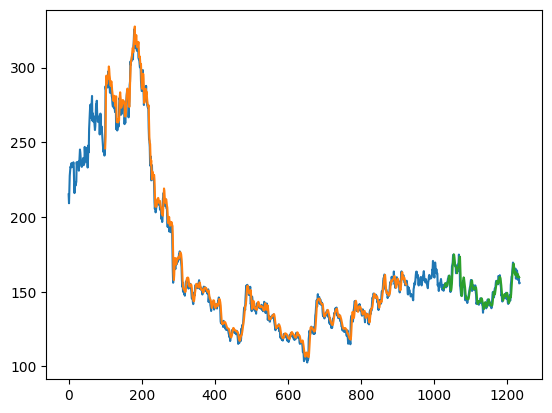

In [38]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [39]:
len(test_data)

309

In [40]:
x_input=test_data[209:].reshape(1,-1)
x_input.shape

(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.16606902734199908,
 0.16651725683549984,
 0.17279246974450907,
 0.17951591214701917,
 0.1763783056925145,
 0.17234424025100842,
 0.16898251904975342,
 0.16831017480950244,
 0.16248319139399375,
 0.16987897803675484,
 0.17525773195876287,
 0.1855670103092784,
 0.18915284625728362,
 0.18354997758852526,
 0.18242940385477363,
 0.17256835499775885,
 0.18108471537427168,
 0.18153294486777233,
 0.1705513222770057,
 0.17189601075750777,
 0.16943074854325407,
 0.1770506499327656,
 0.16270730614074397,
 0.17346481398476016,
 0.18646346929627972,
 0.20416853428955622,
 0.2115643209323173,
 0.20259973106230383,
 0.204616763783057,
 0.19520394441954275,
 0.20797848498431198,
 0.2214253697893322,
 0.2214253697893322,
 0.22523532048408784,
 0.23890632003585827,
 0.24473330345136707,
 0.2440609592111161,
 0.24137158225011207,
 0.24271627073061414,
 0.24069923800986098,
 0.23442402510085153,
 0.2593007619901389,
 0.2590766472433886,
 0.25616315553563423,
 0.2483191393993725,
 0.2617660242043927,
 0

Predicting values for next 30 days

In [42]:
lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.24400708]
101
1 day input [0.16651726 0.17279247 0.17951591 0.17637831 0.17234424 0.16898252
 0.16831017 0.16248319 0.16987898 0.17525773 0.18556701 0.18915285
 0.18354998 0.1824294  0.17256835 0.18108472 0.18153294 0.17055132
 0.17189601 0.16943075 0.17705065 0.16270731 0.17346481 0.18646347
 0.20416853 0.21156432 0.20259973 0.20461676 0.19520394 0.20797848
 0.22142537 0.22142537 0.22523532 0.23890632 0.2447333  0.24406096
 0.24137158 0.24271627 0.24069924 0.23442403 0.25930076 0.25907665
 0.25616316 0.24831914 0.26176602 0.2447333  0.23330345 0.22613178
 0.20103093 0.20416853 0.18870462 0.18287763 0.19049753 0.19766921
 0.19878978 0.20080681 0.19744509 0.19520394 0.19722098 0.19229045
 0.19789332 0.20909906 0.20730614 0.20170327 0.19004931 0.19206634
 0.17817122 0.17548185 0.18377409 0.19139399 0.18780816 0.20192739
 0.18511878 0.18668758 0.23263111 0.2415957  0.25750784 0.25862842
 0.27297176 0.29112506 0.29964142 0.29157329 0.27498879 0.27947109
 0.26781712 0.27162707 0.27431645

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df)

1235

This is the graph of actual values in last 100 days

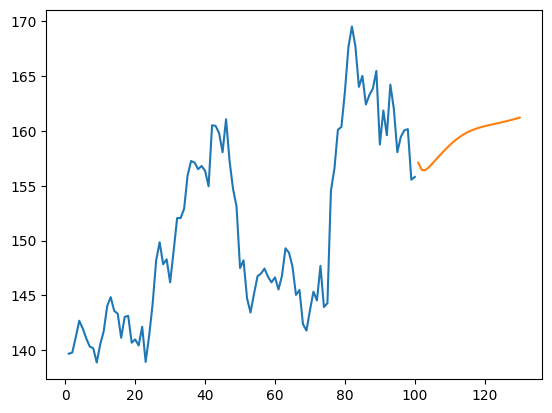

In [45]:
plt.plot(day_new,scaler.inverse_transform(df[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

And this is the graph of predicted values for next 30 days

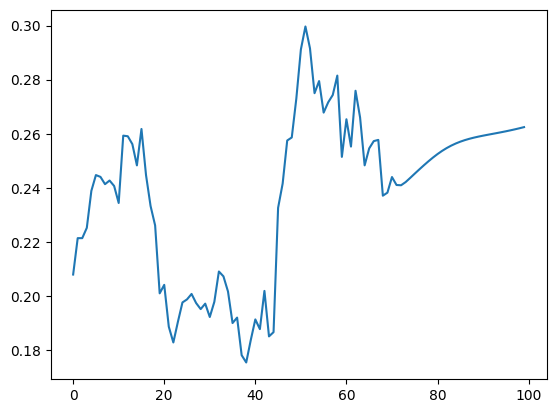

In [54]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1165:])

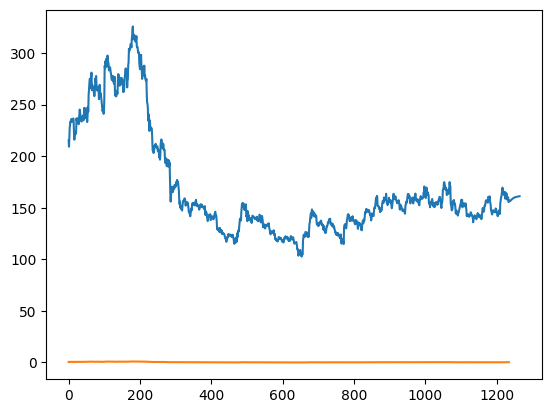

In [49]:
df1=scaler.inverse_transform(df1).tolist()
plt.plot(df1)
plt.plot(df)